In [0]:
# перезагрузить ноутбук
!kill -9 -1

# Генерирование фраз из отдельных слов. Или объединение трех (или несколько) аудиофайлов в один аудиопоток.

Используем эту программу для генерирования фраз содержащих ключевое слово (которое мы потом будем вытаскивать из фразы и распознавать).

Сгенерированные аудиопотоки содержатся в директории Audio_streams.

/content/Simple-Audio-Recognition/Audio_streams/right1_bed_dog

Слова для фраз берутся из директория My_Commands и My_Others:

/content/Simple-Audio-Recognition/MyRawAudio/My_Commands/mod_ee_right1.wav

/content/Simple-Audio-Recognition/MyRawAudio/My_Others/mod_bed.wav




In [1]:
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git

Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 106 (delta 10), reused 0 (delta 0), pack-reused 67
Receiving objects: 100% (106/106), 1.91 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
!pip install soundfile

In [3]:
!pip install pydub

In [4]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline



Using TensorFlow backend.




---



Из отдельных слов создаем фразу. 

а) Берем в произвольном 1 слово из директория My_commands. 

б) Берем в произвольном порядке 2 слова из директория My_others. 

в) соединяем в произвольном порядке выбранные слова. 

г) файл полученный в результате записываем в директорий Audio_streams



---



In [38]:
import wave
import os
import random


command_path = '/content/Simple-Audio-Recognition/MyRawAudio/My_Commands/'
other_path = '/content/Simple-Audio-Recognition/MyRawAudio/My_Others/'

def getRandomFile(path):
  #Returns a random filename, chosen among the files of the given path.
  files = os.listdir(path)
  index = random.randrange(0, len(files))
  return files[index]

files = getRandomFile(command_path)
sound_1 = command_path + '/' + files
print(files)
print(sound_1)

files = getRandomFile(other_path)
sound_2 = other_path + '/' + files
print(files)
print(sound_2)

files = getRandomFile(other_path)
sound_3 = other_path + '/' + files
print(files)
print(sound_3)

infiles = [sound_1, sound_2, sound_3]

#====================
# имя аудиопотока

print(os.path.splitext(sound_1)[0])
s1= (os.path.splitext(sound_1)[0])
s1= (s1.split('_')[-1])
print(s1)

print(os.path.splitext(sound_2)[0])
s2= (os.path.splitext(sound_2)[0])
s2= (s2.split('/')[-1])
s2= (s2.split('_')[-1])
print(s2)

print(os.path.splitext(sound_3)[0])
s3= (os.path.splitext(sound_3)[0])
s3= (s3.split('/')[-1])
s3= (s3.split('_')[-1])
print(s3)

s= s1 + '_'+ s2 + '_' + s3 + '.wav' #имя аудиопотока (слова составляющие фразу)
print(s)
#==================
from pydub import AudioSegment
sound1_ = AudioSegment.from_wav(sound_1)
sound2_ = AudioSegment.from_wav(sound_2)
sound3_ = AudioSegment.from_wav(sound_3)
combined_sounds = sound1_ + sound2_ + sound3_ 
combined_sounds.export('/content/Simple-Audio-Recognition/Audio_streams/' + s, format="wav")
sounds = '/content/Simple-Audio-Recognition/Audio_streams/' + s
#print(sounds)





mod_ee_up1.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_ee_up1.wav
bed.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//bed.wav
mod_dog.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_dog.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_ee_up1
up1
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//bed
bed
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_dog
dog
up1_bed_dog.wav


In [40]:
import IPython.display as ipd
print(s)
ipd.Audio('/content/Simple-Audio-Recognition/Audio_streams/' + s)


up1_bed_dog.wav


/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_ee_up1.wav
samples = 13840   sample rate = 16000   seconds = 0.865


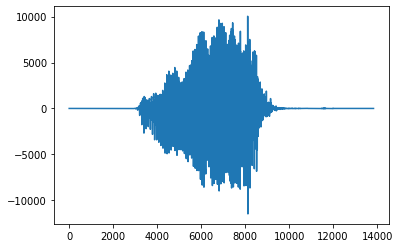

/content/Simple-Audio-Recognition/MyRawAudio/My_Others//bed.wav
samples = 13189   sample rate = 16000   seconds = 0.8243125


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.


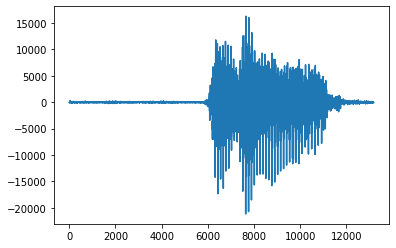

/content/Simple-Audio-Recognition/MyRawAudio/My_Others//bird.wav
samples = 11146   sample rate = 16000 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: WavFileWarning: Chunk (non-data) not understood, skipping it.


  seconds = 0.696625


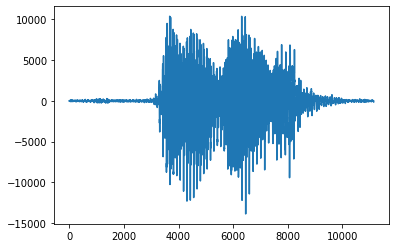

/content/Simple-Audio-Recognition/Audio_streams/up1_bed_bird.wav
samples = 38175   sample rate = 16000   seconds = 2.3859375
16000 [   0    0    0 ...  -52  -66 -122]


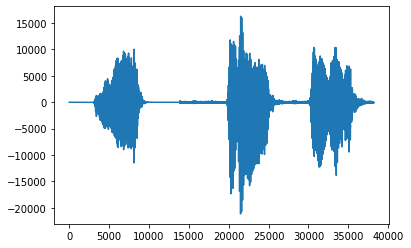

In [8]:
import soundfile as sf
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt


print(sound_1)
f = sf.SoundFile(sound_1)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sound_1)
plt.plot(data)
plt.show()

print(sound_2)
f = sf.SoundFile(sound_2)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sound_2)
plt.plot(data)
plt.show()

print(sound_3)
f = sf.SoundFile(sound_3)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sound_3)
plt.plot(data)
plt.show()

print(sounds)
f = sf.SoundFile(sounds)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sounds)
print(rate, data)
plt.plot(data)
plt.show()



---



---

